In [4]:
# ============================================
# Scraper de reseñas de apps de movilidad en Google Play
# con análisis de sentimiento usando pysentimiento
# ============================================

import pandas as pd
from google_play_scraper import reviews, Sort
from pysentimiento import create_analyzer

# ---------------------------
# 1. Definir apps y ciudades
# ---------------------------
APPS = {
    "Uber": {"playstore_id": "com.ubercab"},
    "Cabify": {"playstore_id": "com.cabify.rider"},
    "DiDi": {"playstore_id": "com.didiglobal.passenger"},
    "InDriver": {"playstore_id": "sinet.startup.inDriver"},
    "Taxis Libres": {"playstore_id": "com.taxislibres.conductor"},
    "Easy Taxi": {"playstore_id": "br.com.easytaxi"}
}

CITIES = ["Bogotá", "Medellín", "Cali", "Barranquilla", "Bucaramanga"]

# ---------------------------
# 2. Crear analizador de sentimientos
# ---------------------------
analyzer = create_analyzer(task="sentiment", lang="es")

# ---------------------------
# 3. Descargar reseñas de Google Play
# ---------------------------
all_reviews = []

for city in CITIES:
    for app_name, ids in APPS.items():
        print(f"📥 Descargando reseñas de {app_name} en {city}...")

        try:
            result, _ = reviews(
                ids["playstore_id"],
                lang="es",
                country="co",
                sort=Sort.NEWEST,
                count=200  # puedes aumentar si quieres más reseñas
            )

            for r in result:
                comentario = r["content"]
                estrellas = r["score"]

                # Análisis de sentimiento
                sentimiento = analyzer.predict(comentario)
                label = sentimiento.output

                # Convertimos a binario: positivo = 1, negativo = 0
                label_binario = 1 if label == "POS" else 0

                all_reviews.append({
                    "ciudad": city,
                    "app": app_name,
                    "comentario": comentario,
                    "estrellas": estrellas,
                    "sentimiento": label,
                    "sentimiento_binario": label_binario
                })

        except Exception as e:
            print(f"⚠️ Error al traer reseñas de {app_name} en {city}: {e}")

# ---------------------------
# 4. Guardar reseñas limpias
# ---------------------------
df_reviews = pd.DataFrame(all_reviews)
df_reviews.to_csv("reviews_limpios.csv", index=False, encoding="utf-8-sig")
print("✅ Archivo 'reviews_limpios.csv' creado con éxito.")

# ---------------------------
# 5. Calificaciones agregadas por app y ciudad
# ---------------------------
df_calif = (
    df_reviews.groupby(["ciudad", "app"])
    .agg(
        total_reviews=("comentario", "count"),
        promedio_estrellas=("estrellas", "mean"),
        positivos=("sentimiento_binario", "sum"),
        negativos=("sentimiento_binario", lambda x: (x == 0).sum())
    )
    .reset_index()
)

df_calif.to_csv("calificaciones_agregadas_por_app_ciudad.csv", index=False, encoding="utf-8-sig")
print("✅ Archivo 'calificaciones_agregadas_por_app_ciudad.csv' creado con éxito.")


C:\Users\crist\anaconda3\envs\movilidad\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📥 Descargando reseñas de Uber en Bogotá...
📥 Descargando reseñas de Cabify en Bogotá...
📥 Descargando reseñas de DiDi en Bogotá...
📥 Descargando reseñas de InDriver en Bogotá...
📥 Descargando reseñas de Taxis Libres en Bogotá...
📥 Descargando reseñas de Easy Taxi en Bogotá...
📥 Descargando reseñas de Uber en Medellín...
📥 Descargando reseñas de Cabify en Medellín...
📥 Descargando reseñas de DiDi en Medellín...
📥 Descargando reseñas de InDriver en Medellín...
📥 Descargando reseñas de Taxis Libres en Medellín...
📥 Descargando reseñas de Easy Taxi en Medellín...
📥 Descargando reseñas de Uber en Cali...
📥 Descargando reseñas de Cabify en Cali...
📥 Descargando reseñas de DiDi en Cali...
📥 Descargando reseñas de InDriver en Cali...
📥 Descargando reseñas de Taxis Libres en Cali...
📥 Descargando reseñas de Easy Taxi en Cali...
📥 Descargando reseñas de Uber en Barranquilla...
📥 Descargando reseñas de Cabify en Barranquilla...
📥 Descargando reseñas de DiDi en Barranquilla...
📥 Descargando reseña

In [6]:
df_reviews


,ciudad,app,comentario,estrellas,sentimiento,sentimiento_binario
0,Bogotá,Uber,hasta ahora no he tenido ningún inconveniente ...,5,POS,1
1,Bogotá,Uber,me parece injusto que la app te multe por hace...,3,NEG,0
2,Bogotá,Uber,buena,5,NEU,0
3,Bogotá,Uber,"genial,muy confiable",5,POS,1
4,Bogotá,Uber,"muy práctico, genial !!!",5,POS,1
...,...,...,...,...,...,...
5995,Bucaramanga,Easy Taxi,Buenas tardes como podría pedir un taxi XL,5,NEU,0
5996,Bucaramanga,Easy Taxi,Esta aplicación no no la utilice no sabe Clara...,1,NEG,0
5997,Bucaramanga,Easy Taxi,Buena,5,NEU,0
5998,Bucaramanga,Easy Taxi,Ni tengo acceso a mi cuenta ni mis datos. Mejo...,1,NEG,0


In [8]:
df_calif

,ciudad,app,total_reviews,promedio_estrellas,positivos,negativos
0,Barranquilla,Cabify,200,3.910,96,104
1,Barranquilla,DiDi,200,3.830,94,106
2,Barranquilla,Easy Taxi,200,1.915,13,187
3,Barranquilla,InDriver,200,3.775,71,129
4,Barranquilla,Taxis Libres,200,3.040,40,160
5,Barranquilla,Uber,200,4.250,101,99
6,Bogotá,Cabify,200,3.910,96,104
7,Bogotá,DiDi,200,3.835,92,108
8,Bogotá,Easy Taxi,200,1.915,13,187
9,Bogotá,InDriver,200,3.775,71,129


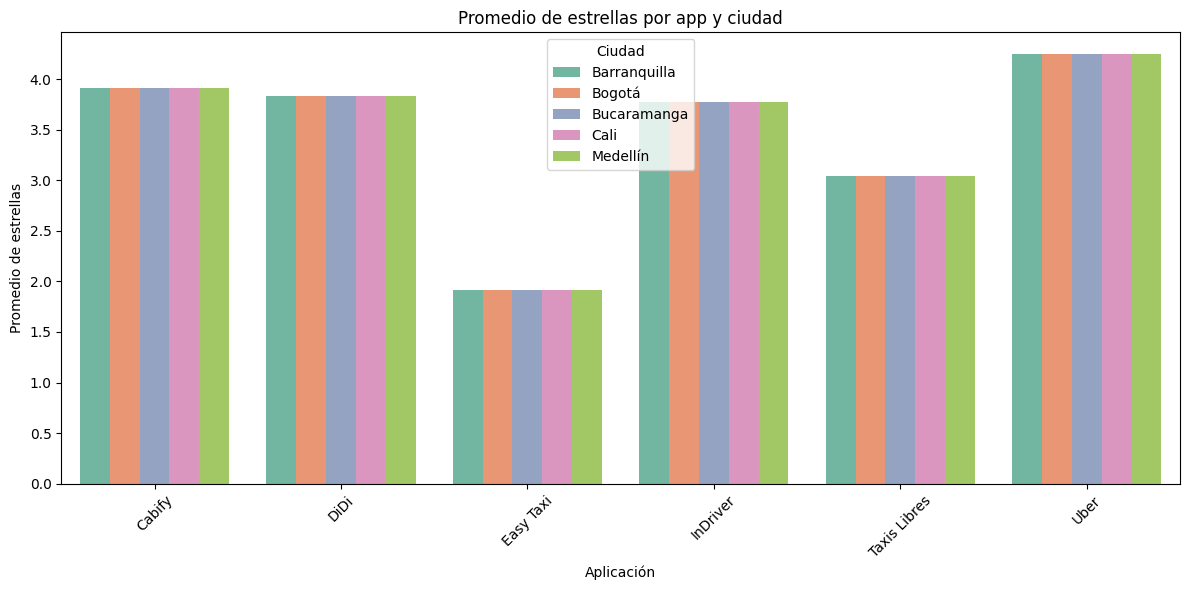

In [12]:
# ============================================
# Visualización de reseñas - Bloque Final
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ---------------------------
# 1. Promedio de estrellas por app y ciudad
# ---------------------------
plt.figure(figsize=(12,6))
sns.barplot(data=df_calif, x="app", y="promedio_estrellas", hue="ciudad", palette="Set2")
plt.title("Promedio de estrellas por app y ciudad")
plt.ylabel("Promedio de estrellas")
plt.xlabel("Aplicación")
plt.xticks(rotation=45)
plt.legend(title="Ciudad")
plt.tight_layout()
plt.show()


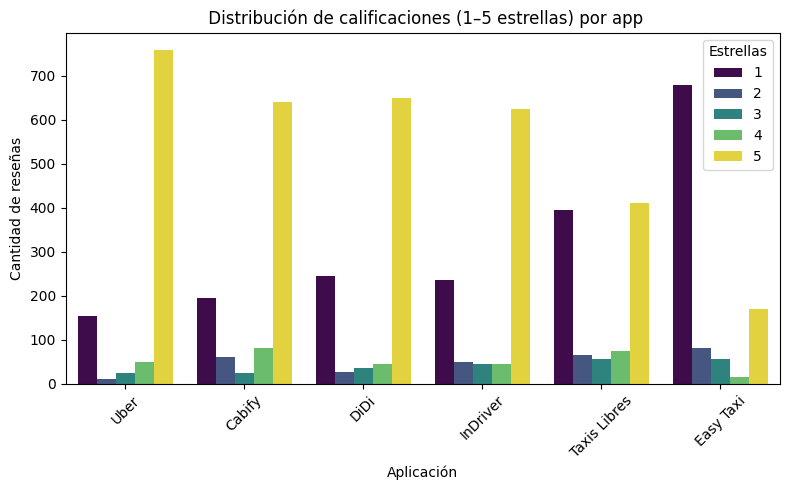

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x="app", hue="estrellas", data=df_reviews, palette="viridis")
plt.title(" Distribución de calificaciones (1–5 estrellas) por app")
plt.ylabel("Cantidad de reseñas")
plt.xlabel("Aplicación")
plt.xticks(rotation=45)
plt.legend(title="Estrellas")
plt.tight_layout()
plt.show()


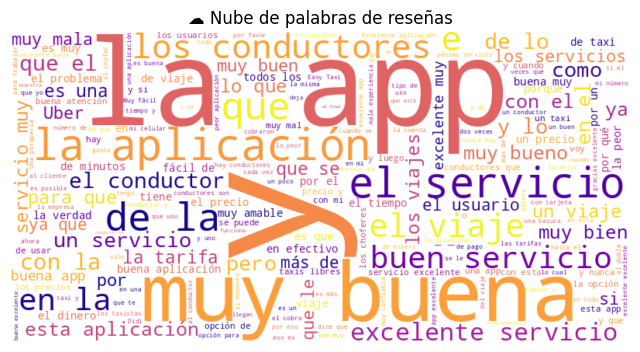

In [40]:
# 3. WordCloud con todas las reseñas
# ---------------------------
texto_todas = " ".join(df_reviews["comentario"].dropna().astype(str))

plt.figure(figsize=(8,6))
wc = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(texto_todas)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("☁️ Nube de palabras de reseñas")

plt.show()

In [16]:
import pandas as pd

df_estimaciones = pd.read_csv("estimacion_apps_ciudad.csv")
df_estimaciones



,app,ciudad,maw_est_low,maw_est_high,drivers_est_low,drivers_est_high
0,inDrive,Bogotá,1541878,1911928,2912,14561
1,inDrive,Medellín,485406,601903,950,4750
2,inDrive,Cali,190355,236040,650,3250
3,inDrive,Barranquilla,190355,236040,625,3125
4,inDrive,Bucaramanga,92005,114086,300,1500
5,DiDi,Bogotá,740101,986802,2912,14561
6,DiDi,Medellín,232994,310659,950,4750
7,DiDi,Cali,91370,121827,650,3250
8,DiDi,Barranquilla,91370,121827,625,3125
9,DiDi,Bucaramanga,44162,58883,300,1500


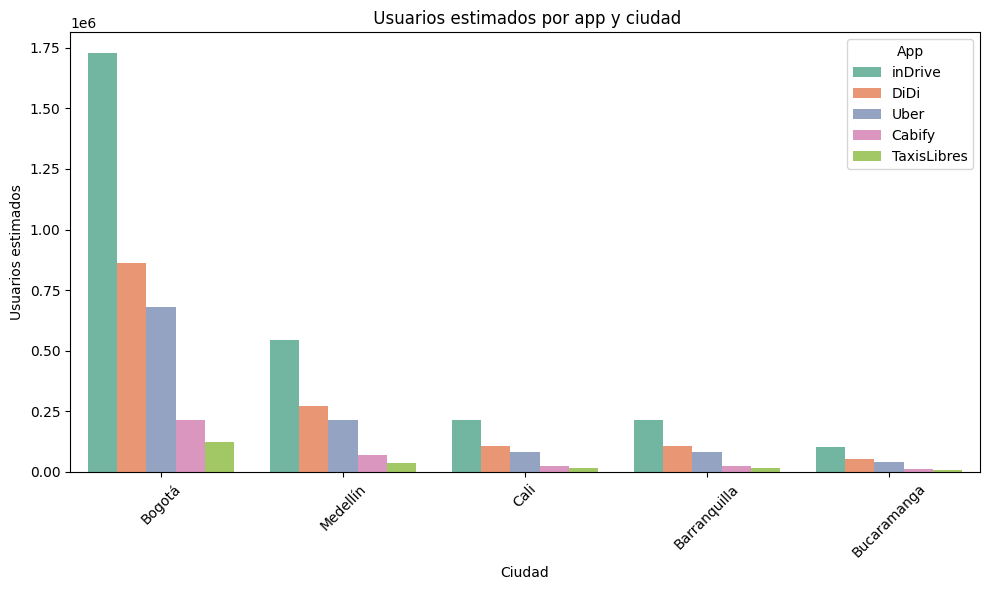

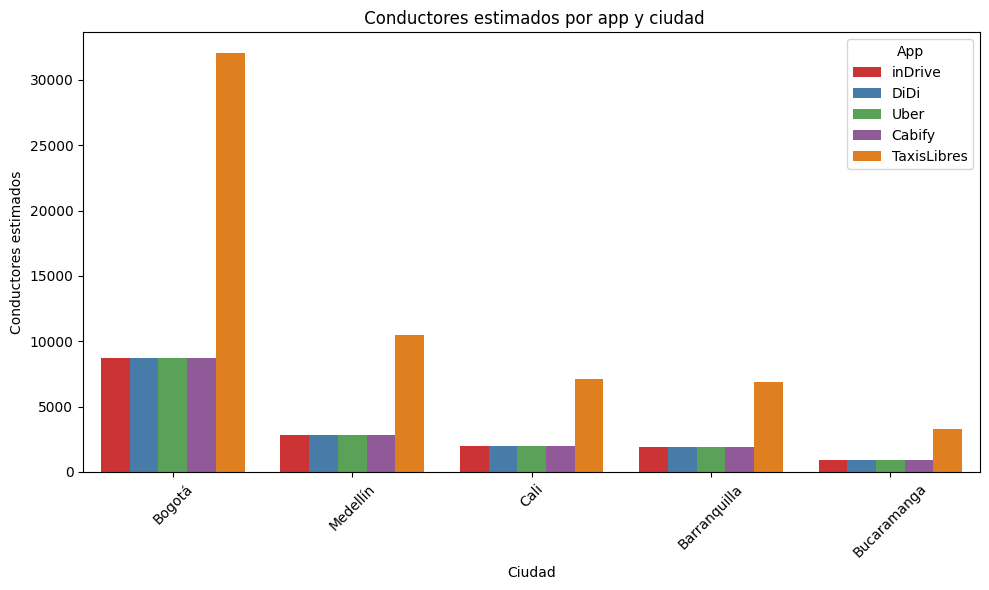

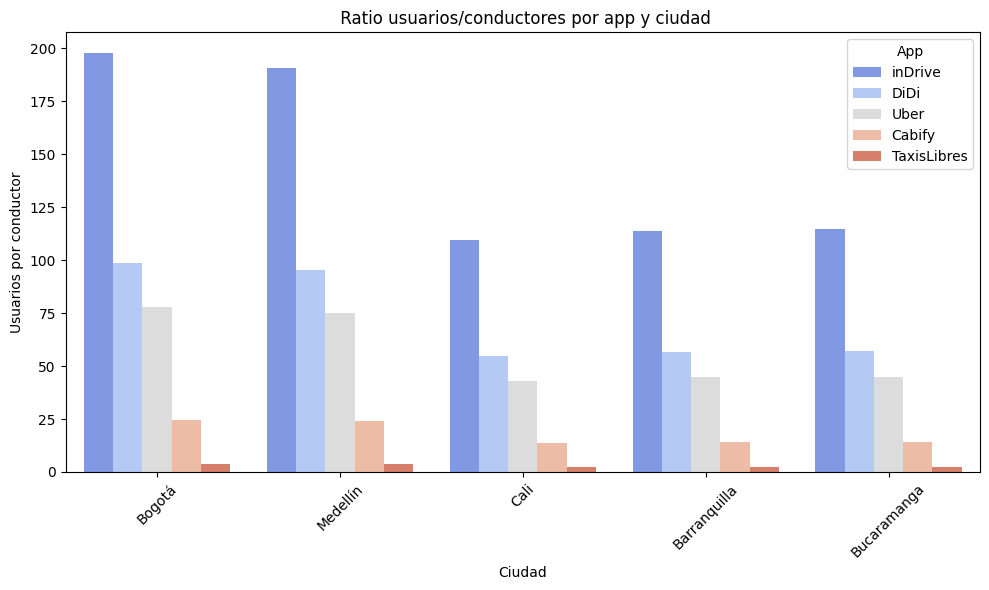

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 1. Crear columnas de promedio
# ================================
df_estimaciones["usuarios_estimados"] = (df_estimaciones["maw_est_low"] + df_estimaciones["maw_est_high"]) / 2
df_estimaciones["conductores_estimados"] = (df_estimaciones["drivers_est_low"] + df_estimaciones["drivers_est_high"]) / 2

# Evitar división por cero
df_estimaciones["ratio_usuarios_conductores"] = df_estimaciones["usuarios_estimados"] / df_estimaciones["conductores_estimados"].replace(0, pd.NA)

# ================================
# 2. Gráfico: Usuarios estimados
# ================================
plt.figure(figsize=(10,6))
sns.barplot(data=df_estimaciones, x="ciudad", y="usuarios_estimados", hue="app", palette="Set2")
plt.title(" Usuarios estimados por app y ciudad")
plt.ylabel("Usuarios estimados")
plt.xlabel("Ciudad")
plt.legend(title="App")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 3. Gráfico: Conductores estimados
# ================================
plt.figure(figsize=(10,6))
sns.barplot(data=df_estimaciones, x="ciudad", y="conductores_estimados", hue="app", palette="Set1")
plt.title(" Conductores estimados por app y ciudad")
plt.ylabel("Conductores estimados")
plt.xlabel("Ciudad")
plt.legend(title="App")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 4. Gráfico: Ratio usuarios/conductores
# ================================
plt.figure(figsize=(10,6))
sns.barplot(data=df_estimaciones, x="ciudad", y="ratio_usuarios_conductores", hue="app", palette="coolwarm")
plt.title(" Ratio usuarios/conductores por app y ciudad")
plt.ylabel("Usuarios por conductor")
plt.xlabel("Ciudad")
plt.legend(title="App")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


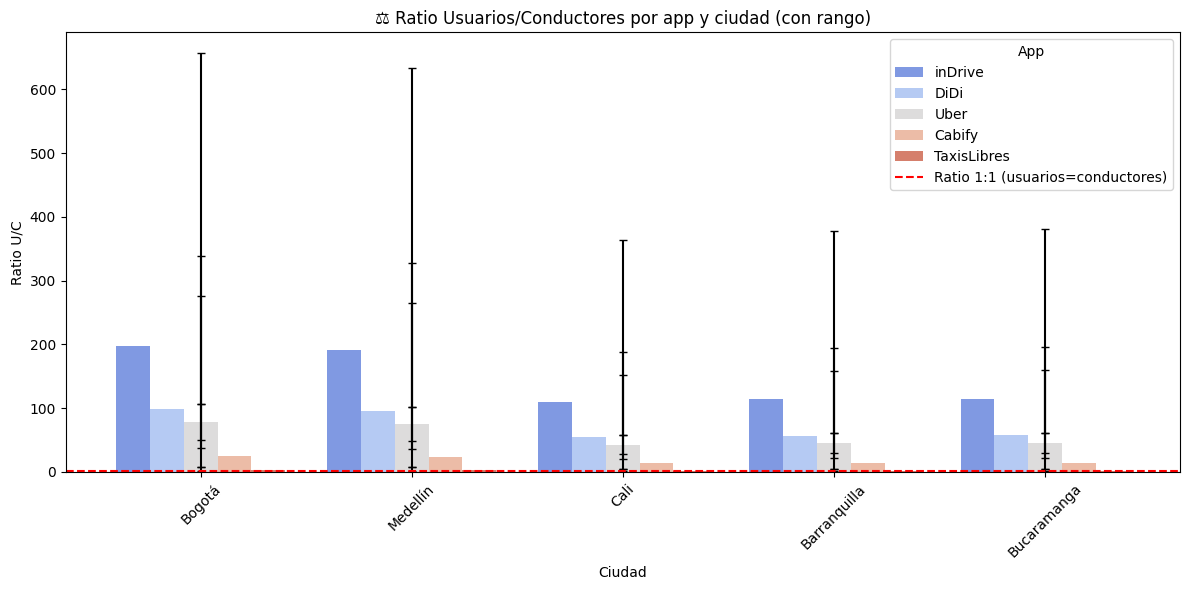

In [93]:
# ============================================
# Ratio usuarios/conductores con rango
# ============================================

# Calcular el promedio del ratio
df_estimaciones["ratio_mean"] = (
    ( (df_estimaciones["maw_est_low"] + df_estimaciones["maw_est_high"]) / 2 ) /
    ( (df_estimaciones["drivers_est_low"] + df_estimaciones["drivers_est_high"]) / 2 )
)

# Calcular el rango del ratio usando low y high extremos
df_estimaciones["ratio_low"] = df_estimaciones["maw_est_low"] / df_estimaciones["drivers_est_high"]
df_estimaciones["ratio_high"] = df_estimaciones["maw_est_high"] / df_estimaciones["drivers_est_low"]

# Error = diferencia entre promedio y low
df_estimaciones["ratio_err"] = df_estimaciones["ratio_mean"] - df_estimaciones["ratio_low"]

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_estimaciones,
    x="ciudad", y="ratio_mean", hue="app",
    palette="coolwarm", errorbar=None
)

# Añadir barras de error manualmente
for i, row in df_estimaciones.iterrows():
    plt.errorbar(
        x=i % len(df_estimaciones["ciudad"].unique()), 
        y=row["ratio_mean"],
        yerr=[[row["ratio_mean"]-row["ratio_low"]], [row["ratio_high"]-row["ratio_mean"]]],
        fmt="none", c="black", capsize=3
    )

plt.axhline(1, color="red", linestyle="--", label="Ratio 1:1 (usuarios=conductores)")
plt.title("⚖️ Ratio Usuarios/Conductores por app y ciudad (con rango)")
plt.ylabel("Ratio U/C")
plt.xlabel("Ciudad")
plt.xticks(rotation=45)
plt.legend(title="App")
plt.tight_layout()
plt.show()


In [24]:
# ============================================
# Dashboard resumen de estimaciones
# ============================================

# Calcular promedios
df_estimaciones["maw_mean"] = (df_estimaciones["maw_est_low"] + df_estimaciones["maw_est_high"]) / 2
df_estimaciones["drivers_mean"] = (df_estimaciones["drivers_est_low"] + df_estimaciones["drivers_est_high"]) / 2

# Ratios
df_estimaciones["ratio_low"] = df_estimaciones["maw_est_low"] / df_estimaciones["drivers_est_high"]
df_estimaciones["ratio_high"] = df_estimaciones["maw_est_high"] / df_estimaciones["drivers_est_low"]
df_estimaciones["ratio_mean"] = df_estimaciones["maw_mean"] / df_estimaciones["drivers_mean"]

# Consolidar en tabla resumen
dashboard = df_estimaciones.groupby(["app", "ciudad"]).agg(
    usuarios_min = ("maw_est_low", "min"),
    usuarios_max = ("maw_est_high", "max"),
    usuarios_prom = ("maw_mean", "mean"),
    
    conductores_min = ("drivers_est_low", "min"),
    conductores_max = ("drivers_est_high", "max"),
    conductores_prom = ("drivers_mean", "mean"),
    
    ratio_min = ("ratio_low", "min"),
    ratio_max = ("ratio_high", "max"),
    ratio_prom = ("ratio_mean", "mean")
).reset_index()

# Mostrar
import pandas as pd
pd.set_option("display.float_format", "{:,.2f}".format)

# ============================================
# Guardar dashboard en CSV
# ============================================

dashboard.to_csv("dashboard_estimaciones.csv", index=False, encoding="utf-8-sig")
print("✅ Dashboard guardado en 'dashboard_estimaciones.csv'")



✅ Dashboard guardado en 'dashboard_estimaciones.csv'


In [26]:
dashboard

,app,ciudad,usuarios_min,usuarios_max,usuarios_prom,conductores_min,conductores_max,conductores_prom,ratio_min,ratio_max,ratio_prom
0,Cabify,Barranquilla,15228,38071,"26,649.50",625,3125,"1,875.00",4.87,60.91,14.21
1,Cabify,Bogotá,123350,308375,"215,862.50",2912,14561,"8,736.50",8.47,105.90,24.71
2,Cabify,Bucaramanga,7360,18401,"12,880.50",300,1500,900.00,4.91,61.34,14.31
3,Cabify,Cali,15228,38071,"26,649.50",650,3250,"1,950.00",4.69,58.57,13.67
4,Cabify,Medellín,38832,97081,"67,956.50",950,4750,"2,850.00",8.18,102.19,23.84
5,DiDi,Barranquilla,91370,121827,"106,598.50",625,3125,"1,875.00",29.24,194.92,56.85
6,DiDi,Bogotá,740101,986802,"863,451.50",2912,14561,"8,736.50",50.83,338.87,98.83
7,DiDi,Bucaramanga,44162,58883,"51,522.50",300,1500,900.00,29.44,196.28,57.25
8,DiDi,Cali,91370,121827,"106,598.50",650,3250,"1,950.00",28.11,187.43,54.67
9,DiDi,Medellín,232994,310659,"271,826.50",950,4750,"2,850.00",49.05,327.01,95.38


In [20]:
import numpy as np

# Simular método de pago: 0 = efectivo, 1 = tarjeta
np.random.seed(42)  # Para reproducibilidad
df_estimaciones["pago_tarjeta"] = np.random.choice([0, 1], size=len(df_estimaciones), p=[0.6, 0.4])
df_estimaciones

,app,ciudad,maw_est_low,maw_est_high,drivers_est_low,drivers_est_high,usuarios_estimados,conductores_estimados,ratio_usuarios_conductores,pago_tarjeta
0,inDrive,Bogotá,1541878,1911928,2912,14561,1726903.0,8736.5,197.665312,0
1,inDrive,Medellín,485406,601903,950,4750,543654.5,2850.0,190.755965,1
2,inDrive,Cali,190355,236040,650,3250,213197.5,1950.0,109.332051,1
3,inDrive,Barranquilla,190355,236040,625,3125,213197.5,1875.0,113.705333,0
4,inDrive,Bucaramanga,92005,114086,300,1500,103045.5,900.0,114.495000,0
5,DiDi,Bogotá,740101,986802,2912,14561,863451.5,8736.5,98.832656,0
6,DiDi,Medellín,232994,310659,950,4750,271826.5,2850.0,95.377719,0
7,DiDi,Cali,91370,121827,650,3250,106598.5,1950.0,54.665897,1
8,DiDi,Barranquilla,91370,121827,625,3125,106598.5,1875.0,56.852533,1
9,DiDi,Bucaramanga,44162,58883,300,1500,51522.5,900.0,57.247222,1


In [30]:
df_estimaciones["pago_efectivo"] = 1 - df_estimaciones["pago_tarjeta"]

dashboard_pago = df_estimaciones.groupby(["app", "ciudad"]).agg(
    porcentaje_tarjeta = ("pago_tarjeta", "mean"),
    porcentaje_efectivo = ("pago_efectivo", "mean")
).reset_index()

# Unir con tu dashboard principal
dashboard_final = dashboard.merge(dashboard_pago, on=["app", "ciudad"])
dashboard_final

,app,ciudad,usuarios_min,usuarios_max,usuarios_prom,conductores_min,conductores_max,conductores_prom,ratio_min,ratio_max,ratio_prom,porcentaje_tarjeta,porcentaje_efectivo
0,Cabify,Barranquilla,15228,38071,"26,649.50",625,3125,"1,875.00",4.87,60.91,14.21,0.00,1.00
1,Cabify,Bogotá,123350,308375,"215,862.50",2912,14561,"8,736.50",8.47,105.90,24.71,0.00,1.00
2,Cabify,Bucaramanga,7360,18401,"12,880.50",300,1500,900.00,4.91,61.34,14.31,0.00,1.00
3,Cabify,Cali,15228,38071,"26,649.50",650,3250,"1,950.00",4.69,58.57,13.67,0.00,1.00
4,Cabify,Medellín,38832,97081,"67,956.50",950,4750,"2,850.00",8.18,102.19,23.84,0.00,1.00
5,DiDi,Barranquilla,91370,121827,"106,598.50",625,3125,"1,875.00",29.24,194.92,56.85,1.00,0.00
6,DiDi,Bogotá,740101,986802,"863,451.50",2912,14561,"8,736.50",50.83,338.87,98.83,0.00,1.00
7,DiDi,Bucaramanga,44162,58883,"51,522.50",300,1500,900.00,29.44,196.28,57.25,1.00,0.00
8,DiDi,Cali,91370,121827,"106,598.50",650,3250,"1,950.00",28.11,187.43,54.67,1.00,0.00
9,DiDi,Medellín,232994,310659,"271,826.50",950,4750,"2,850.00",49.05,327.01,95.38,0.00,1.00


In [52]:
"se agrupar por ciudad y app, y calcular el promedio de pago_tarjeta, que te da el porcentaje de pagos con tarjeta:"

dashboard_pago = df_estimaciones.groupby(["app", "ciudad"]).agg(
    porcentaje_tarjeta = ("pago_tarjeta", "mean")
).reset_index()


In [40]:
"obtendremos: estimaciones de usuarios y conductores"
"ratios de saturación"
"porcentaje de pagos con tarjeta"

dashboard_final = dashboard.merge(dashboard_pago, on=["app", "ciudad"])
dashboard_final 

,app,ciudad,usuarios_min,usuarios_max,usuarios_prom,conductores_min,conductores_max,conductores_prom,ratio_min,ratio_max,ratio_prom,porcentaje_tarjeta
0,Cabify,Barranquilla,15228,38071,"26,649.50",625,3125,"1,875.00",4.87,60.91,14.21,0.00
1,Cabify,Bogotá,123350,308375,"215,862.50",2912,14561,"8,736.50",8.47,105.90,24.71,0.00
2,Cabify,Bucaramanga,7360,18401,"12,880.50",300,1500,900.00,4.91,61.34,14.31,0.00
3,Cabify,Cali,15228,38071,"26,649.50",650,3250,"1,950.00",4.69,58.57,13.67,0.00
4,Cabify,Medellín,38832,97081,"67,956.50",950,4750,"2,850.00",8.18,102.19,23.84,0.00
5,DiDi,Barranquilla,91370,121827,"106,598.50",625,3125,"1,875.00",29.24,194.92,56.85,1.00
6,DiDi,Bogotá,740101,986802,"863,451.50",2912,14561,"8,736.50",50.83,338.87,98.83,0.00
7,DiDi,Bucaramanga,44162,58883,"51,522.50",300,1500,900.00,29.44,196.28,57.25,1.00
8,DiDi,Cali,91370,121827,"106,598.50",650,3250,"1,950.00",28.11,187.43,54.67,1.00
9,DiDi,Medellín,232994,310659,"271,826.50",950,4750,"2,850.00",49.05,327.01,95.38,0.00


🧠 ¿Por qué es importante?
Porque el método de pago puede influir en:

Percepción de seguridad (tarjeta vs efectivo)

Accesibilidad (no todos tienen tarjeta)

Funcionalidad (apps que permiten ambos métodos vs solo uno)

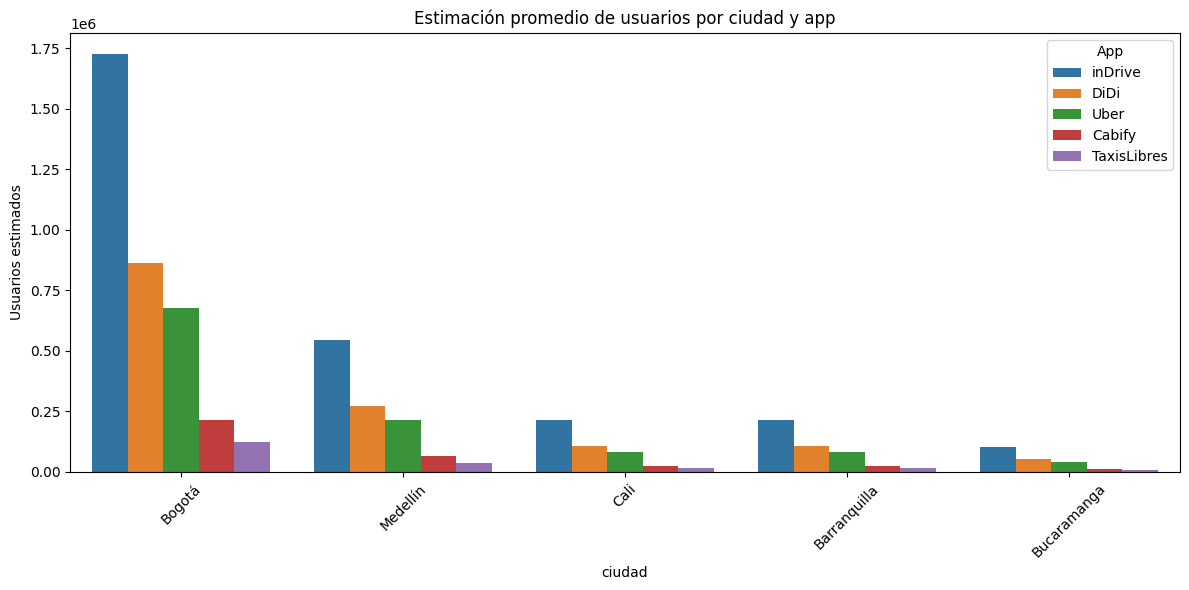

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_estimaciones, x="ciudad", y="maw_mean", hue="app")
plt.title("Estimación promedio de usuarios por ciudad y app")
plt.ylabel("Usuarios estimados")
plt.xticks(rotation=45)
plt.legend(title="App")
plt.tight_layout()
plt.show()


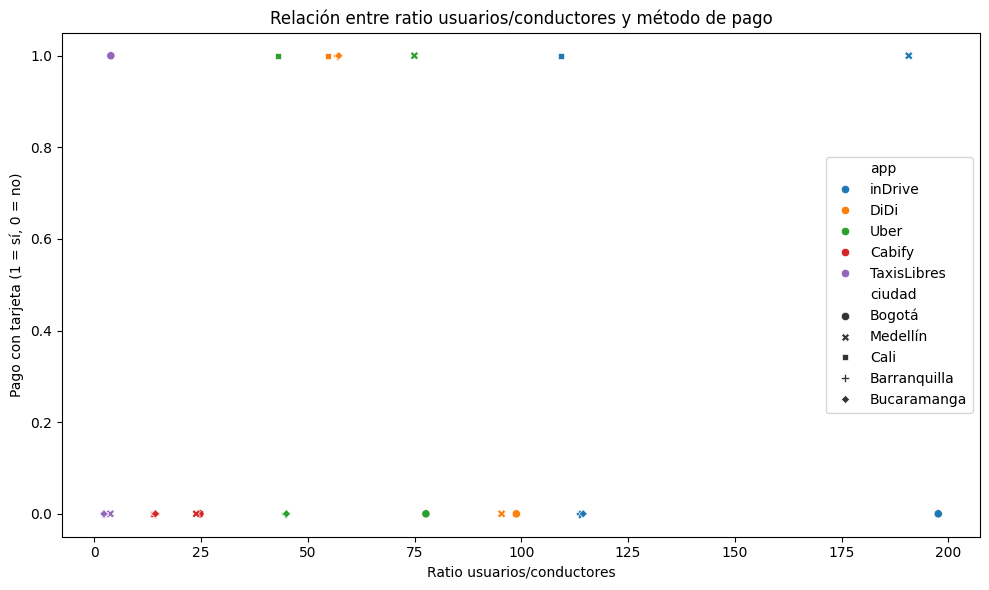

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_estimaciones, x="ratio_mean", y="pago_tarjeta", hue="app", style="ciudad")
plt.title("Relación entre ratio usuarios/conductores y método de pago")
plt.xlabel("Ratio usuarios/conductores")
plt.ylabel("Pago con tarjeta (1 = sí, 0 = no)")
plt.tight_layout()
plt.show()


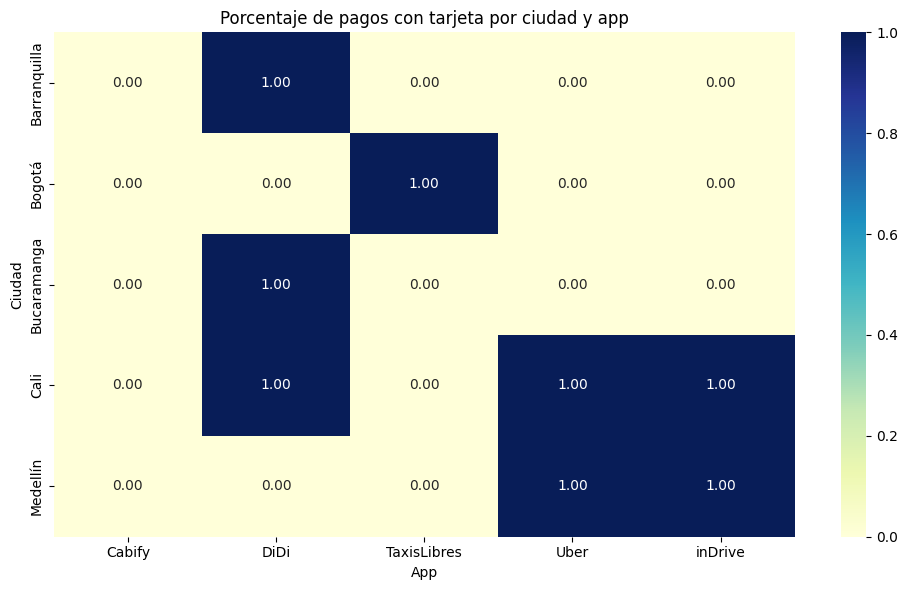

In [46]:
heatmap_data = df_estimaciones.groupby(["ciudad", "app"])["pago_tarjeta"].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Porcentaje de pagos con tarjeta por ciudad y app")
plt.ylabel("Ciudad")
plt.xlabel("App")
plt.tight_layout()
plt.show()
"Un vistazo rápido a qué apps están más digitalizadas en cada ciudad."